# U1B model: neutrino masses inversion

The idea is to check the neutrino mases inversion to one loop.
Leshouches dictionary, SPHENO_4.0.3, micromegas_5.0.4

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [3]:
import pyslha
import pyU1B_LesHouches_generator
import neutrino_analytic_v2
import NEUTRINO2018

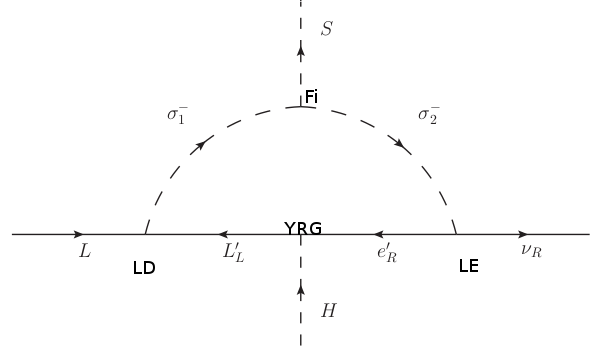

In [4]:
from IPython.display import Image
Image("zee-couplings.png")

Run diccionary 

In [5]:
x=[]

for i in range(0,10):
    
    #opend the dictionary
    xdict = pyU1B_LesHouches_generator.buildSLHAinFile()

    #Benchmark point i-esimo    
    Lambda2 = -7.23E-2
    YA1 = np.exp(np.random.uniform(np.log(1.*10**(-1)),np.log(10**(0))))
    YC1 = 1.0 #control the Fvv mass
    vx = np.random.uniform(1500,5000)
    YRG = np.exp(np.random.uniform(np.log(1.*10**(-2)),np.log(10**(0))))

    Fi11 = np.exp(np.random.uniform(np.log(1.*10**(-2)),np.log(10**(0))))
    Fi12 = 0.0
    Fi21 = 0.0
    Fi22 = np.exp(np.random.uniform(np.log(1.*10**(-2)),np.log(10**(0))))

    #Modify one parameter
    xdict.blocks['MINPAR'].entries[2]='%.6E    # Lambda2INPUT'%Lambda2
    xdict.blocks['MINPAR'].entries[7]='%.6E    # YA1INPUT'%YA1
    xdict.blocks['MINPAR'].entries[11]='%.6E    # YC1INPUT'%YC1
    xdict.blocks['MINPAR'].entries[13]='%.6E    # YRGINPUT'%YRG
    xdict.blocks['MINPAR'].entries[15]='%.6E    # vXInput'%vx

    xdict.blocks['FIIN'].entries[1,1]='%.6E    # Fi(1,1)'%Fi11
    xdict.blocks['FIIN'].entries[1,2]='%.6E    # Fi(1,2)'%Fi12
    xdict.blocks['FIIN'].entries[2,1]='%.6E    # Fi(2,1)'%Fi21
    xdict.blocks['FIIN'].entries[2,2]='%.6E    # Fi(2,2)'%Fi22

    pyslha.writeSLHAFile('LesHouches.in.U1B_low',xdict) 

    #run SPheno
    spheno = subprocess.getoutput('~/Work/SPheno-4.0.3/bin/SPhenoU1B LesHouches.in.U1B_low')    
    so = subprocess.getoutput('cat SPheno.spc.U1B')

    ZP22 = eval(so.split('# ZP(2,1)')[1].split()[2])
    ZP23 = eval(so.split('# ZP(2,1)')[1].split()[7])
    ZP24 = eval(so.split('# ZP(2,1)')[1].split()[12])
    ZP25 = eval(so.split('# ZP(2,1)')[1].split()[17])

    ZP32 = eval(so.split('# ZP(2,1)')[1].split()[27])
    ZP33 = eval(so.split('# ZP(2,1)')[1].split()[32])
    ZP34 = eval(so.split('# ZP(2,1)')[1].split()[37])
    ZP35 = eval(so.split('# ZP(2,1)')[1].split()[42])

    ZP42 = eval(so.split('# ZP(2,1)')[1].split()[52])
    ZP43 = eval(so.split('# ZP(2,1)')[1].split()[57])
    ZP44 = eval(so.split('# ZP(2,1)')[1].split()[62])
    ZP45 = eval(so.split('# ZP(2,1)')[1].split()[67])

    ZP52 = eval(so.split('# ZP(2,1)')[1].split()[77])
    ZP53 = eval(so.split('# ZP(2,1)')[1].split()[82])
    ZP54 = eval(so.split('# ZP(2,1)')[1].split()[87])
    ZP55 = eval(so.split('# ZP(2,1)')[1].split()[92])

    mH2=eval(so.split('Block MASS')[1].split()[17])
    mH3=eval(so.split('Block MASS')[1].split()[21])
    mH4=eval(so.split('Block MASS')[1].split()[25])
    mH5=eval(so.split('Block MASS')[1].split()[29])
    meD1=eval(so.split('# Fvv')[1].split()[1])
    meD2=eval(so.split('# Fvv')[1].split()[5])

    VL11=eval(so.split('Block UELDMIX')[1].split()[6])
    VL12=eval(so.split('Block UELDMIX')[1].split()[11])
    VL21=eval(so.split('Block UELDMIX')[1].split()[16])
    VL22=eval(so.split('Block UELDMIX')[1].split()[21])

    UL11=eval(so.split('Block UERDMIX')[1].split()[6])
    UL12=eval(so.split('Block UERDMIX')[1].split()[11])
    UL21=eval(so.split('Block UERDMIX')[1].split()[16])
    UL22=eval(so.split('Block UERDMIX')[1].split()[21])

    #PMNS matrix 2018 to 3\sigma https://arxiv.org/abs/1708.01186
    k = NEUTRINO2018.nuexpvalues()
    mv1 = k['mv1']
    mv2 = k['mv2']
    mv3 = k['mv3']
    U11 = k['U11']
    U12 = k['U12']
    U13 = k['U13']
    U21 = k['U21']
    U22 = k['U22']
    U23 = k['U23']
    U31 = k['U31']
    U32 = k['U32']
    U33 = k['U33']
                             
    #Loop factors
    L1 = neutrino_analytic_v2.Lab(ZP22,ZP32,ZP42,ZP52,ZP24,ZP34,ZP44,ZP54,meD1,meD2,mH2,mH3,mH4,mH5,VL11,\
                                VL21,UL11,UL21)
    L2 = neutrino_analytic_v2.Lab(ZP23,ZP33,ZP43,ZP53,ZP25,ZP35,ZP45,ZP55,meD1,meD2,mH2,mH3,mH4,mH5,VL11,\
                                VL21,UL11,UL21)

    #Random free parameters and Mathematic rutine
    he12 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
    he13 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
    he22 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
    he23 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))

    hd11 = -(1/L1)*(he23*mv2*U12 - he22*mv3*U13)/(he13*he22 - he12*he23)
    hd12 = -(1/L1)*(he23*mv2*U22 - he22*mv3*U23)/(he13*he22 - he12*he23)
    hd13 = -(1/L1)*(he23*mv2*U32 - he22*mv3*U33)/(he13*he22 - he12*he23)

    hd21 = +(1/L2)*(he13*mv2*U12 - he12*mv3*U13)/(he13*he22 - he12*he23)
    hd22 = +(1/L2)*(he13*mv2*U22 - he12*mv3*U23)/(he13*he22 - he12*he23)
    hd23 = +(1/L2)*(he13*mv2*U32 - he12*mv3*U33)/(he13*he22 - he12*he23)

    ######## RUN SECOND TIME ########
    xdict = pyU1B_LesHouches_generator.buildSLHAinFile()

    #Modify one parameter
    xdict.blocks['MINPAR'].entries[2]='%.6E    # Lambda2INPUT'%L2
    xdict.blocks['MINPAR'].entries[7]='%.6E    # YA1INPUT'%YA1
    xdict.blocks['MINPAR'].entries[11]='%.6E    # YC1INPUT'%YC1
    xdict.blocks['MINPAR'].entries[13]='%.6E    # YRGINPUT'%YRG
    xdict.blocks['MINPAR'].entries[15]='%.6E    # vXInput'%vx

    xdict.blocks['FIIN'].entries[1,1]='%.6E    # Fi(1,1)'%Fi11
    xdict.blocks['FIIN'].entries[1,2]='%.6E    # Fi(1,2)'%Fi12
    xdict.blocks['FIIN'].entries[2,1]='%.6E    # Fi(2,1)'%Fi21
    xdict.blocks['FIIN'].entries[2,2]='%.6E    # Fi(2,2)'%Fi22

    xdict.blocks['LDIN'].entries[1,1]='%.6E    # LD(1,1)'%hd11
    xdict.blocks['LDIN'].entries[1,2]='%.6E    # LD(1,2)'%hd12
    xdict.blocks['LDIN'].entries[1,3]='%.6E    # LD(1,3)'%hd13
    xdict.blocks['LDIN'].entries[2,1]='%.6E    # LD(2,1)'%hd21
    xdict.blocks['LDIN'].entries[2,2]='%.6E    # LD(2,2)'%hd22
    xdict.blocks['LDIN'].entries[2,3]='%.6E    # LD(2,3)'%hd23

    xdict.blocks['LEIN'].entries[1,1]='%.6E    # LE(1,1)'%he12
    xdict.blocks['LEIN'].entries[1,2]='%.6E    # LE(1,2)'%he13
    xdict.blocks['LEIN'].entries[2,1]='%.6E    # LE(2,1)'%he22
    xdict.blocks['LEIN'].entries[2,2]='%.6E    # LE(2,2)'%he23

    pyslha.writeSLHAFile('LesHouches.in.U1B_low',xdict) 

    #run SPheno againt
    spheno = subprocess.getoutput('~/Work/SPheno-4.0.3/bin/SPhenoU1B LesHouches.in.U1B_low')    
    so = subprocess.getoutput('cat SPheno.spc.U1B')

    #take spheno output
    MZp = eval(so.split('# VWm')[1].split()[1])
    mnu1 = np.abs(eval(so.split('# Fe_3')[1].split()[1]))
    mnu2 = np.abs(eval(so.split('# Fe_3')[1].split()[5]))
    mnu3 = np.abs(eval(so.split('# Fe_3')[1].split()[13]))

    ZP22 = eval(so.split('# ZP(2,1)')[1].split()[2])
    ZP23 = eval(so.split('# ZP(2,1)')[1].split()[7])
    ZP24 = eval(so.split('# ZP(2,1)')[1].split()[12])
    ZP25 = eval(so.split('# ZP(2,1)')[1].split()[17])

    ZP32 = eval(so.split('# ZP(2,1)')[1].split()[27])
    ZP33 = eval(so.split('# ZP(2,1)')[1].split()[32])
    ZP34 = eval(so.split('# ZP(2,1)')[1].split()[37])
    ZP35 = eval(so.split('# ZP(2,1)')[1].split()[42])

    ZP42 = eval(so.split('# ZP(2,1)')[1].split()[52])
    ZP43 = eval(so.split('# ZP(2,1)')[1].split()[57])
    ZP44 = eval(so.split('# ZP(2,1)')[1].split()[62])
    ZP45 = eval(so.split('# ZP(2,1)')[1].split()[67])

    ZP52 = eval(so.split('# ZP(2,1)')[1].split()[77])
    ZP53 = eval(so.split('# ZP(2,1)')[1].split()[82])
    ZP54 = eval(so.split('# ZP(2,1)')[1].split()[87])
    ZP55 = eval(so.split('# ZP(2,1)')[1].split()[92])

    mH2=eval(so.split('Block MASS')[1].split()[17])
    mH3=eval(so.split('Block MASS')[1].split()[21])
    mH4=eval(so.split('Block MASS')[1].split()[25])
    mH5=eval(so.split('Block MASS')[1].split()[29])
    meD1=eval(so.split('# Fvv')[1].split()[1])
    meD2=eval(so.split('# Fvv')[1].split()[5])

    VL11=eval(so.split('Block UELDMIX')[1].split()[6])
    VL12=eval(so.split('Block UELDMIX')[1].split()[11])
    VL21=eval(so.split('Block UELDMIX')[1].split()[16])
    VL22=eval(so.split('Block UELDMIX')[1].split()[21])

    UL11=eval(so.split('Block UERDMIX')[1].split()[6])
    UL12=eval(so.split('Block UERDMIX')[1].split()[11])
    UL21=eval(so.split('Block UERDMIX')[1].split()[16])
    UL22=eval(so.split('Block UERDMIX')[1].split()[21])

    x.append([YA1,YC1,vx,YRG,Fi11,Fi12,Fi21,Fi22,hd11,hd12,hd13,hd21,hd22,hd23,he12,he13,he22,he23,MZp,\
              mnu1,mnu2,mnu3,ZP22,ZP23,ZP24,ZP25,ZP32,ZP33,ZP34,ZP35,ZP42,ZP43,ZP44,ZP45,ZP52,ZP53,ZP54,\
              ZP55,mH2,mH3,mH4,mH5,meD1,meD2,VL11,VL12,VL21,VL22,UL11,UL12,UL21,UL22,L1,L2,mv1,mv2,mv3])

x=np.asarray(x)
xd=pd.DataFrame(x,columns=['YA1','YC1','vx','YRG','Fi11','Fi12','Fi21','Fi22','hd11','hd12','hd13',\
                           'hd21','hd22','hd23','he12','he13','he22','he23','MZp','mnu1','mnu2','mnu3',\
                           'ZP22','ZP23','ZP24','ZP25','ZP32','ZP33','ZP34','ZP35','ZP42','ZP43','ZP44',\
                           'ZP45','ZP52','ZP53','ZP54','ZP55','mH2','mH3','mH4','mH5','meD1','meD2',\
                           'VL11','VL12','VL21','VL22','UL11','UL12','UL21','UL22','L1','L2','mv1',\
                           'mv2','mv3'])  

In [11]:
xd[['mnu1','mv1','mnu2','mv2','mnu3','mv3']]

,mnu1,mv1,mnu2,mv2,mnu3,mv3
0,4.137662e-29,1.000000e-20,8.647564e-12,8.647763e-12,4.911342e-11,4.911454e-11
1,5.692460e-28,1.000000e-20,8.396454e-12,8.396646e-12,5.035841e-11,5.035957e-11
2,5.526937e-29,1.000000e-20,8.625290e-12,8.625489e-12,4.932112e-11,4.932226e-11
3,4.266124e-29,1.000000e-20,8.883098e-12,8.883352e-12,5.090038e-11,5.090154e-11
4,7.226377e-28,1.000000e-20,8.698303e-12,8.698503e-12,4.930505e-11,4.930619e-11
5,3.974528e-28,1.000000e-20,8.712517e-12,8.712717e-12,5.004378e-11,5.004493e-11
6,7.001769e-28,1.000000e-20,8.722155e-12,8.722353e-12,5.030433e-11,5.030551e-11
7,6.679517e-29,1.000000e-20,8.421084e-12,8.421279e-12,5.019067e-11,5.019183e-11
8,9.006343e-28,1.000000e-20,8.424929e-12,8.425124e-12,4.985634e-11,4.985748e-11
9,4.386994e-28,1.000000e-20,8.980966e-12,8.981171e-12,4.939762e-11,4.939876e-11


In [12]:
print("================== final point ===========================")
print(" Experimental values (PMNS) \n")
print(mv1,mv2,mv3)
print("=============================================")
print(" Rutine inversion \n")
print(mnu1,mnu2,mnu3)
print("=============================================")

================== final point ===========================
 Experimental values (PMNS) 

1e-20 8.98117106929e-12 4.93987572472e-11
 Rutine inversion 

4.38699428e-28 8.98096571e-12 4.93976195e-11


In [8]:
#For good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

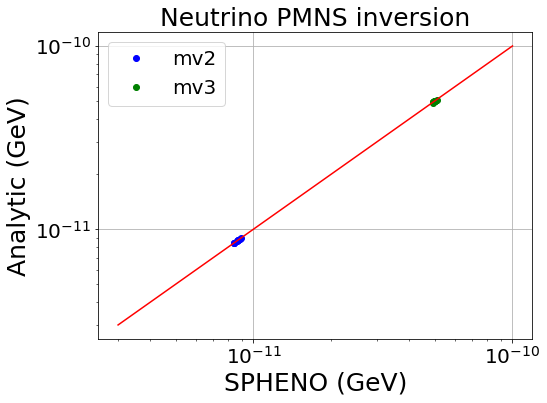

In [10]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.mv1,xd.mn1,'bo')
plt.loglog(xd.mnu2,xd.mv2,'bo')
plt.loglog(xd.mnu3,xd.mv3,'go')

a = np.linspace(3e-12,1e-10,10)
plt.plot(a,a,'r-')

plt.title(r'Neutrino PMNS inversion',size=25)
plt.xlabel(r'SPHENO (GeV)',size=25)
plt.ylabel(r'Analytic (GeV)',size=25)
plt.legend()

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses_v2.pdf')

Diagonalization by hand

Neutrino $M_{ij}^{\nu}$ matrix:

\begin{equation}
M_{ik}^{\nu} = (h_d)^{\alpha i} \Lambda^{\alpha\beta} (h_e)^{\beta k}
\end{equation}

In [31]:
y=[]

for i in range(0,xd.shape[0]):
    
    a = neutrino_analytic_v2.Mab(xd.ZP22[i],xd.ZP23[i],xd.ZP24[i],xd.ZP25[i],xd.ZP32[i],xd.ZP33[i],\
                                 xd.ZP34[i],xd.ZP35[i],xd.ZP42[i],xd.ZP43[i],xd.ZP44[i],xd.ZP45[i],\
                                 xd.ZP52[i],xd.ZP53[i],xd.ZP54[i],xd.ZP55[i],xd.meD1[i],xd.meD2[i],\
                                 xd.mH2[i],xd.mH3[i],xd.mH4[i],xd.mH5[i],xd.VL11[i],xd.VL21[i],xd.UL11[i],\
                                 xd.UL21[i],xd.hd11[i],xd.hd12[i],xd.hd13[i],xd.hd21[i],xd.hd22[i],\
                                 xd.hd23[i],xd.he12[i],xd.he13[i],0.,xd.he22[i],xd.he23[i],0.)
    
    mn1 = a[0]
    mn2 = a[1]
    mn3 = a[2]
    
    y.append([mn1,mn2,mn3])

y=np.asarray(y)
yd=pd.DataFrame(y,columns=['mn1','mn2','mn3'])